## 4 nodes

In [1]:
%run ../imports.py

In [2]:
G = nx.DiGraph()

In [3]:
G.add_nodes_from([0,1,2,3])
G.add_edges_from([
    (1,0),
    (2,0),
    (1,3),
    (2,3)
])

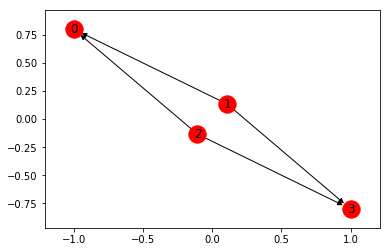

In [4]:
nx.draw_networkx(G)

In [5]:
L = out_degree_laplacian(G)
np.linalg.matrix_rank(L)

2

In [6]:
Q = orth_matrix(L).T
rL = np.matmul(Q, np.matmul(L, np.transpose(Q)))
sigma = solve_lyapunov(rL, np.identity(np.linalg.matrix_rank(L)))
x = 2*np.matmul(np.transpose(Q), np.matmul(sigma, Q))
eqL = np.linalg.pinv(x)

In [7]:
print(Q)

[[-5.0000e-01  5.0000e-01  5.0000e-01 -5.0000e-01]
 [-1.6997e-17 -7.0711e-01  7.0711e-01  5.5511e-17]]


In [8]:
sigma

array([[2.5000e-01, 2.7756e-17],
       [2.7756e-17, 2.5000e-01]])

In [9]:
print(eqL)

[[ 0.5 -0.5 -0.5  0.5]
 [-0.5  1.5 -0.5 -0.5]
 [-0.5 -0.5  1.5 -0.5]
 [ 0.5 -0.5 -0.5  0.5]]


In [10]:
posG, negG = separate_graphs(eqL)

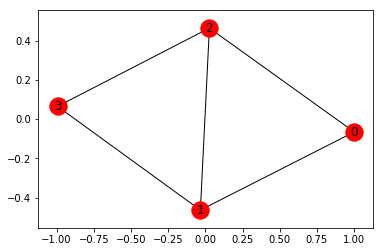

In [12]:
nx.draw_networkx(posG)

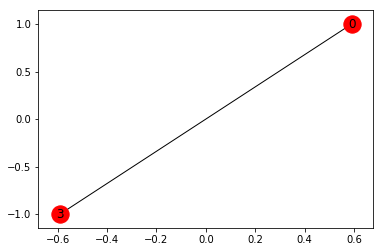

In [13]:
nx.draw_networkx(negG)